## Assignment module 7

The goal of this assignment is to find the optimal parameter setting of a neural network to predict the arrival delay of busses in Stockholm. The input data for the trained model consists of the dwell time, the scheduled travel time, upstream stop delay and the recurrent delay.

In [1]:
#-------------------------------------------------Package import------------------------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)
df.info()

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


### Parameter optimalization part 1:

Find the optimal number of layers, units for each layer and dropout locations for the model.

In [3]:
#-------------------------------------------------Parameters to test------------------------------------------------------------------

layers = [[32], [64], [32,32], [32,64], [64,32], [64,64], [32,32,32], [32,32,64],[32,64,32],[64,32,32],[32,64,64],[64,32,64],[64,64,32],[64,64,64]]
dropouts_loc = [False, "1-2", "2-3", "1-2-3"]

In [4]:
#-------------------------------------------------Training and testing for parameter combinations------------------------------------------------------------------

for i in layers:
    for j in dropouts_loc:
        model = Sequential()
        if len(i) == 1:
            model.add(Dense(i[0], activation='relu', input_dim=4))
        
        elif len(i) == 2:
            model.add(Dense(i[0], activation='relu', input_dim=4))
            if j == "1-2":
                model.add(Dropout(0.5))                
            model.add(Dense(i[1], activation='relu'))
            
        elif len(i) == 3:
            model.add(Dense(i[0], activation='relu', input_dim=4))
            if j == "1-2" or j == "1-2-3":
                model.add(Dropout(0.5)) 
            model.add(Dense(i[1], activation='relu'))
            if j == "2-3" or j == "1-2-3":
                model.add(Dropout(0.5))
            model.add(Dense(i[2], activation='relu'))
            
        else:
            print("ERROR: Number of layers is out of range")
            
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mae', metrics=['mae'])
        hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32,verbose=0)
            
        y_pred = model.predict(X_test)
            
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
            
        print("\ni=", i, "j=", j)
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")                     
  

7/7 [==============================] - 0s 2ms/step

i= [32] j= False
Mean Absolute Error: 27.91993725769222
Mean Squared Error: 1411.1667072548933
R-squared: 0.8803892307579015
7/7 [==============================] - 0s 2ms/step

i= [32] j= 1-2
Mean Absolute Error: 28.084714396297933
Mean Squared Error: 1423.2368798107896
R-squared: 0.8793661605445289
7/7 [==============================] - 0s 826us/step

i= [32] j= 2-3
Mean Absolute Error: 27.43103037327528
Mean Squared Error: 1378.2627656365937
R-squared: 0.8831781753580175
7/7 [==============================] - 0s 1ms/step

i= [32] j= 1-2-3
Mean Absolute Error: 27.828245679140093
Mean Squared Error: 1417.4779598173936
R-squared: 0.8798542877423097
7/7 [==============================] - 0s 1ms/step

i= [64] j= False
Mean Absolute Error: 27.403595308959485
Mean Squared Error: 1358.0466525093088
R-squared: 0.884891697105525
7/7 [==============================] - 0s 1ms/step

i= [64] j= 1-2
Mean Absolute Error: 28.217109679430724
Mean Squ

7/7 [==============================] - 0s 1ms/step

i= [64, 32, 64] j= 1-2
Mean Absolute Error: 45.58313887029886
Mean Squared Error: 4260.436417278305
R-squared: 0.6388845665378482
7/7 [==============================] - 0s 2ms/step

i= [64, 32, 64] j= 2-3
Mean Absolute Error: 48.39631294816732
Mean Squared Error: 4919.284733450766
R-squared: 0.5830404529358859
7/7 [==============================] - 0s 1ms/step

i= [64, 32, 64] j= 1-2-3
Mean Absolute Error: 55.78758466184139
Mean Squared Error: 6779.412933940704
R-squared: 0.42537561872056584
7/7 [==============================] - 0s 1ms/step

i= [64, 64, 32] j= False
Mean Absolute Error: 27.643507742881773
Mean Squared Error: 1388.3683229699934
R-squared: 0.8823216263195134
7/7 [==============================] - 0s 1ms/step

i= [64, 64, 32] j= 1-2
Mean Absolute Error: 47.350553442239764
Mean Squared Error: 4936.494400477088
R-squared: 0.5815817581545848
7/7 [==============================] - 0s 935us/step

i= [64, 64, 32] j= 2-3
Mean 

### Parameter optimization part 2:

Check whether it is useful to use the early stopping and learning rate reduction callback options.

In [5]:
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_dim=4))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mae', metrics=['mae'])


early_stop_list = [False, True]
learning_rate_list = [False, True]

for i in early_stop_list:
    for j in learning_rate_list:
        early_stop = None
        reduce_lr = None
        if i == True:
            early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
        
        if j == True:
            reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
            
        if i == True and j == True:
            print("True, True")
            hist = model2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr],verbose=0)
        elif i == True:
            print("True, False")
            hist = model2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop],verbose=0)
        elif j == True:
            print("False, True")
            hist = model2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[reduce_lr],verbose=0)
        else:
            print("False, False")
            hist = model2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32,verbose=0)
            
        y_pred2 = model2.predict(X_test)
        mae_2 = mean_absolute_error(y_test, y_pred2)
        mse_2 = mean_squared_error(y_test, y_pred2)
        r2_2 = r2_score(y_test, y_pred2)
        
        print("\ni=", i, "j=", j)
        print(f"Mean Absolute Error: {mae_2}")
        print(f"Mean Squared Error: {mse_2}")
        print(f"R-squared: {r2_2}")


False, False
7/7 [==============================] - 0s 1ms/step

i= False j= False
Mean Absolute Error: 27.677040670067072
Mean Squared Error: 1390.8837153154745
R-squared: 0.8821084211667545
False, True
7/7 [==============================] - 0s 2ms/step

i= False j= True
Mean Absolute Error: 27.76516624942422
Mean Squared Error: 1401.3504232002792
R-squared: 0.8812212609360761
True, False
7/7 [==============================] - 0s 999us/step

i= True j= False
Mean Absolute Error: 27.76516624942422
Mean Squared Error: 1401.3504232002792
R-squared: 0.8812212609360761
True, True
7/7 [==============================] - 0s 1ms/step

i= True j= True
Mean Absolute Error: 27.76516624942422
Mean Squared Error: 1401.3504232002792
R-squared: 0.8812212609360761


### Analyzing the results:

MAE, MSE and R2 of the final model:

In [6]:
model3 = Sequential()

model3.add(Dense(64, activation='relu', input_dim=4))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mae', metrics=['mae'])

hist = model3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr],verbose=0)

y_pred3 = model3.predict(X_test)
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

7/7 [==============================] - 0s 1ms/step
Mean Absolute Error: 27.742798726037144
Mean Squared Error: 1382.0133405545507
R-squared: 0.8828602758860906


Plot showing the training vs. the validation MAE over the epochs:

[]

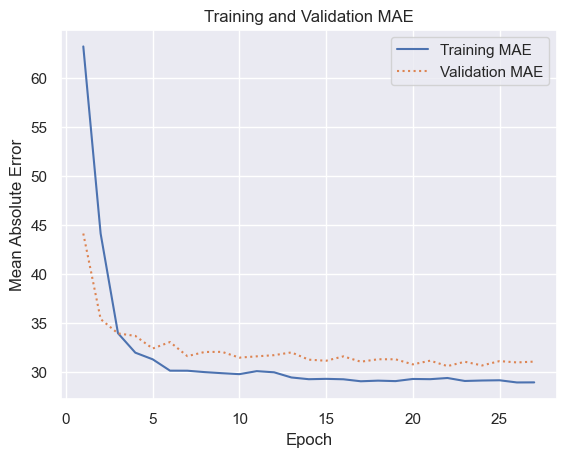

In [7]:
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()


Plot comparing the actual values with the values predicted by the neural network:

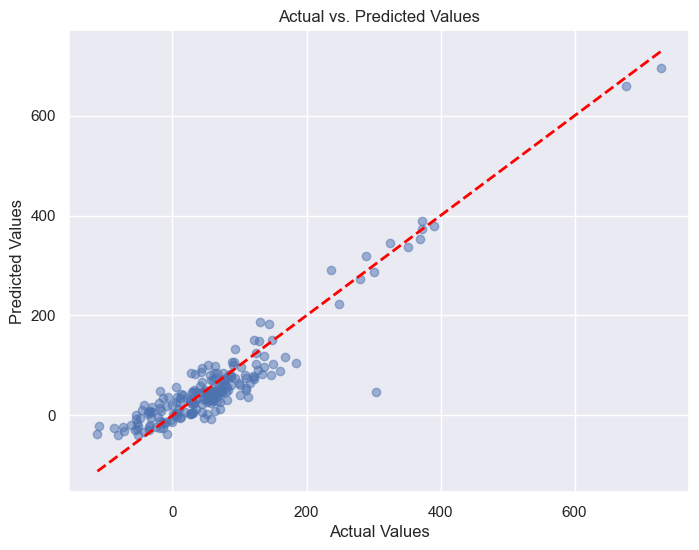

In [8]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred3, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()